<a href="https://colab.research.google.com/github/hermathena/Student-Exam-Performance/blob/main/Student_Exam_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle
from scipy import stats
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

# Models
#============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#===========================================================================
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

# tqdm
#================================================================
from tqdm.auto import tqdm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_exam_data.csv to student_exam_data.csv


In [3]:
df = pd.read_csv("student_exam_data.csv")

In [4]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [5]:
df.isna().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [6]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [7]:
df.columns.tolist()

['Study Hours', 'Previous Exam Score', 'Pass/Fail']

In [8]:
df = df.rename(columns= {'Study Hours': "study_hours", 'Previous Exam Score': "previous_exam_score", 'Pass/Fail': "pass/fail"})
df.columns.tolist()

['study_hours', 'previous_exam_score', 'pass/fail']

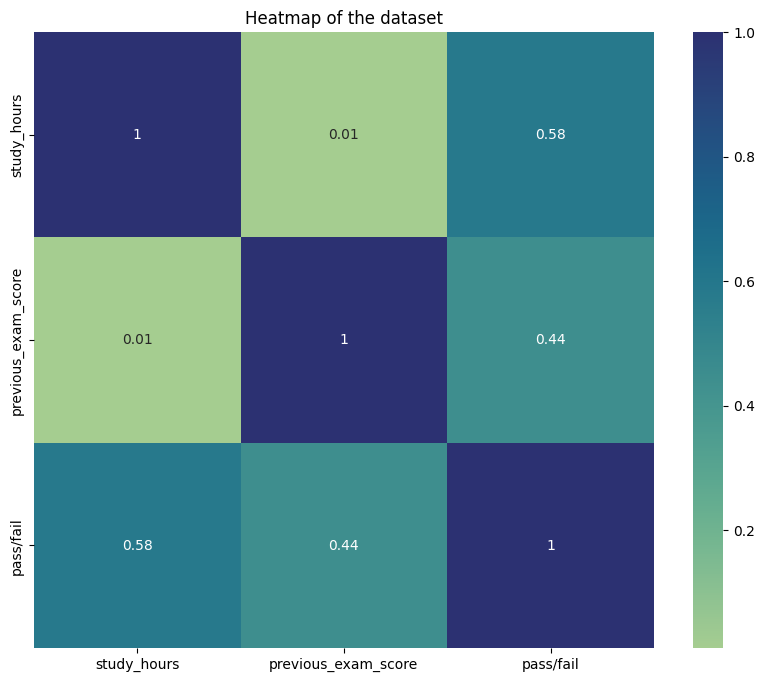

In [10]:
columns_for_heatmap = ['study_hours', 'previous_exam_score', 'pass/fail']

plt.figure(figsize=(10, 8))
sns.heatmap(df[columns_for_heatmap].corr(), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [27]:
cols = df.columns.to_list()[:-1]
# Spearman Correlation
#=============================================================
stats.spearmanr(df[cols[0]], df[cols[1]])

SignificanceResult(statistic=0.011861423445693783, pvalue=0.7913369108268153)

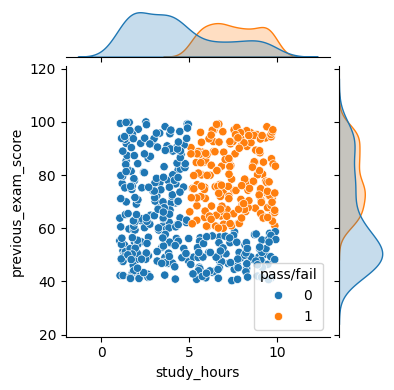

In [28]:
g = sns.jointplot(df, x = cols[0], y = cols[1], hue = 'pass/fail',height = 4)
g.fig.show()

In [11]:
y = df['pass/fail']
X = df.drop(['pass/fail'], axis=1)

In [36]:
SEED = 0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = SEED)

In [38]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [39]:
%%time
# fit the GridSearch model to training data


xgb_cv.fit(X_train, y_train)

CPU times: user 8.27 s, sys: 81.1 ms, total: 8.35 s
Wall time: 5.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [40]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 10,
 'subsample': 0.7}

In [41]:
y_pred = xgb_cv.predict(X_test)

In [42]:
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0


In [43]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot()
    plt.show()

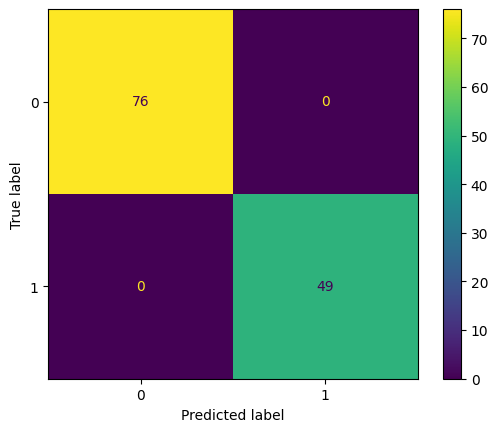

In [19]:
conf_matrix_plot(xgb_cv, X_test, y_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

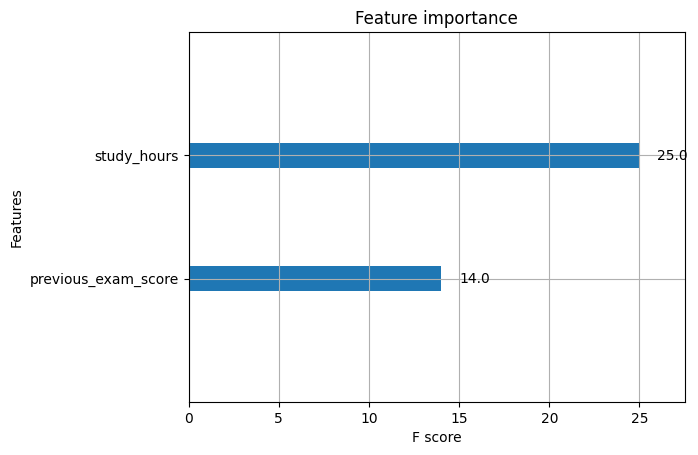

In [44]:
plot_importance(xgb_cv.best_estimator_)

**Further Exploration**

In [34]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
clf1 = LogisticRegression(random_state = SEED, n_jobs = -1)
clf2 = RandomForestClassifier(random_state = SEED, n_jobs = -1)
clf3 = ExtraTreesClassifier(bootstrap = True, n_jobs = -1, random_state = SEED)
clf4 = XGBClassifier(random_state = SEED, n_jobs = -1)
clf5 = LGBMClassifier(random_state = SEED, n_jobs = -1)
clf6 = CatBoostClassifier(random_state = SEED, verbose = 0)
clf7 = SVC(probability = True, random_state = SEED)

MODELS = [clf1, clf2, clf3, clf4, clf5, clf6, clf7]

In [48]:
# Training!!!
#=====================================================================
accuracy_train = {}
accuracy_test = {}

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    accuracy_train[name] = balanced_accuracy_score(y_train, y_pred_train)
    accuracy_test[name] = balanced_accuracy_score(y_test, y_pred_test)
    print(f'* {name} finished.')

  0%|          | 0/7 [00:00<?, ?it/s]

* LogisticRegression finished.
* RandomForestClassifier finished.
* ExtraTreesClassifier finished.
* XGBClassifier finished.
[LightGBM] [Info] Number of positive: 135, number of negative: 240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 375, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360000 -> initscore=-0.575364
[LightGBM] [Info] Start training from score -0.575364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

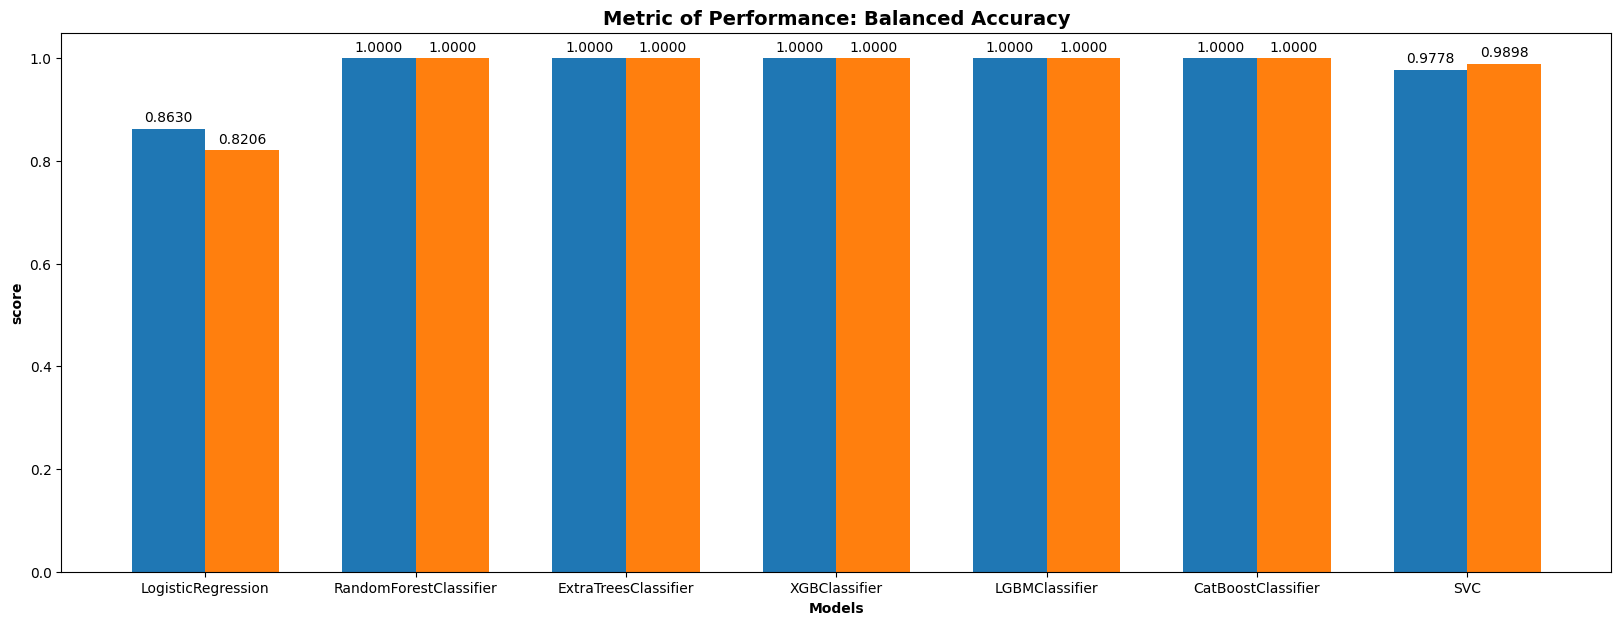

In [49]:
metric_train = pd.DataFrame.from_dict(accuracy_train, orient = 'index')
metric_train = metric_train.rename(columns = {0:'Train'})

metric_test = pd.DataFrame.from_dict(accuracy_test, orient = 'index')
metric_test = metric_test.rename(columns = {0:'Test'})

fig,ax = plt.subplots(figsize = (20,7))

labels = metric_train.index.to_list()
values_train = metric_train.iloc[:,0].to_list()
values_test = metric_test.iloc[:,0].to_list()
x = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(x = x - width/2, height = values_train, width = width)
rects2 = ax.bar(x = x + width/2, height = values_test, width = width)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{height:.4f}',
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = "offset points",
                    ha = "center",
                    va = "bottom")

autolabel(rects1)
autolabel(rects2)
ax.set_title("Metric of Performance: Balanced Accuracy", fontsize = 14, fontweight = "bold", color = "black")
ax.set_ylabel("score", fontsize = 10, fontweight = "bold", color = "black")
ax.set_xlabel("Models", fontsize = 10, fontweight = "bold", color = "black")
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.show()

In [50]:
# Predictions!!
#===================================================================
y_pred_train = clf6.predict(X_train_scaled)
y_pred_prob_train = clf6.predict_proba(X_train_scaled)[:,1]

y_pred_test = clf6.predict(X_test_scaled)
y_pred_prob_test = clf6.predict_proba(X_test_scaled)[:,1]

In [51]:
print('--------------------------------------------------------------')
print(' ' * 14, 'Classification Report Train')
print('--------------------------------------------------------------')
print(classification_report(y_train, y_pred_train, target_names = ['Fail','Pass']))
print('')
print('--------------------------------------------------------------')
print(' ' * 14, 'Classification Report Test')
print('--------------------------------------------------------------')
print(classification_report(y_test, y_pred_test, target_names = ['Fail','Pass']))

--------------------------------------------------------------
               Classification Report Train
--------------------------------------------------------------
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00       240
        Pass       1.00      1.00      1.00       135

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375


--------------------------------------------------------------
               Classification Report Test
--------------------------------------------------------------
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00        76
        Pass       1.00      1.00      1.00        49

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



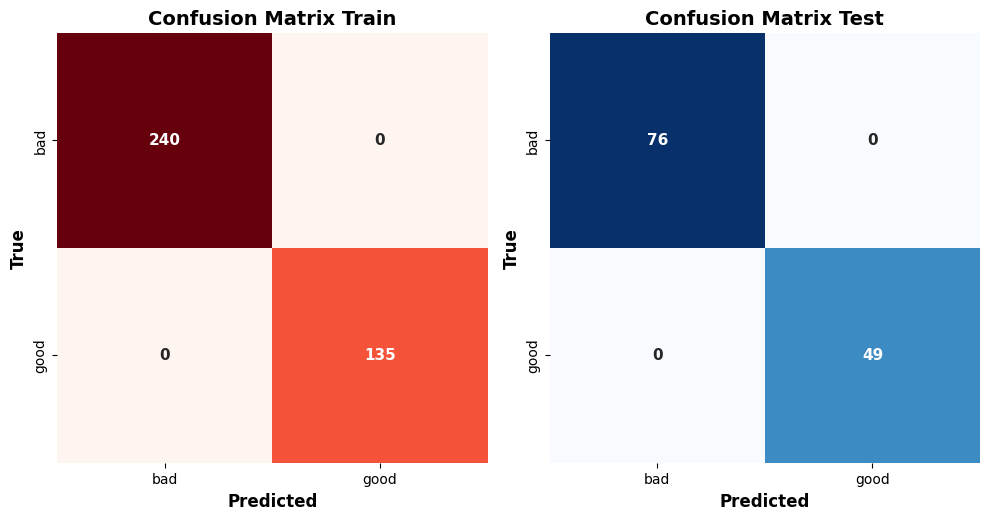

In [52]:
cf_mx_train = confusion_matrix(y_train, y_pred_train)
cf_mx_test = confusion_matrix(y_test, y_pred_test)

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
axs = axs.flat

sns.heatmap(cf_mx_train, cmap = 'Reds', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, fmt = '', cbar = False, square = True, xticklabels = ['bad','good'], yticklabels = ['bad','good'], ax = axs[0])
sns.heatmap(cf_mx_test, cmap = 'Blues', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, fmt = '', cbar = False, square = True, xticklabels = ['bad','good'], yticklabels = ['bad','good'], ax = axs[1])
axs[0].set_xlabel('Predicted', fontsize = 12, fontweight = "bold", color = "black")
axs[1].set_xlabel('Predicted', fontsize = 12, fontweight = "bold", color = "black")
axs[0].set_ylabel('True', fontsize = 12, fontweight = "bold", color = "black")
axs[1].set_ylabel('True', fontsize = 12, fontweight = "bold", color = "black")
axs[0].set_title('Confusion Matrix Train', fontsize = 14, fontweight = "bold", color = "black")
axs[1].set_title('Confusion Matrix Test', fontsize = 14, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

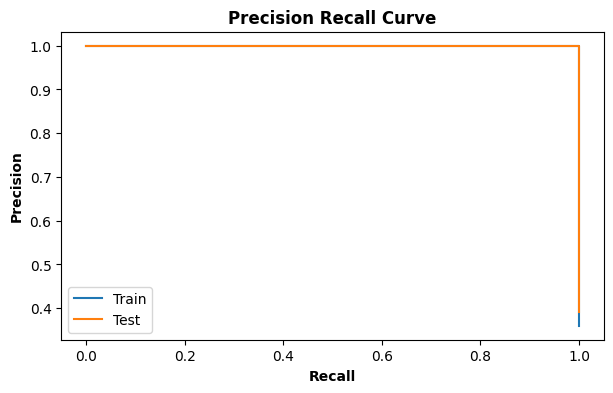

In [53]:
precision_train, recall_train, _ = precision_recall_curve(y_train,
                                                          y_pred_prob_train)

precision_test, recall_test, _ = precision_recall_curve(y_test,
                                                        y_pred_prob_test)

fig,ax = plt.subplots(figsize = (7,4))

ax.plot(recall_train, precision_train, label = 'Train')
ax.plot(recall_test, precision_test, label = 'Test')
ax.set_title("Precision Recall Curve", fontsize = 12, fontweight = "bold")
ax.set_xlabel("Recall", fontsize = 10, fontweight = "bold", color = "black")
ax.set_ylabel("Precision", fontsize = 10, fontweight = "bold", color = "black")
ax.legend()
fig.show()

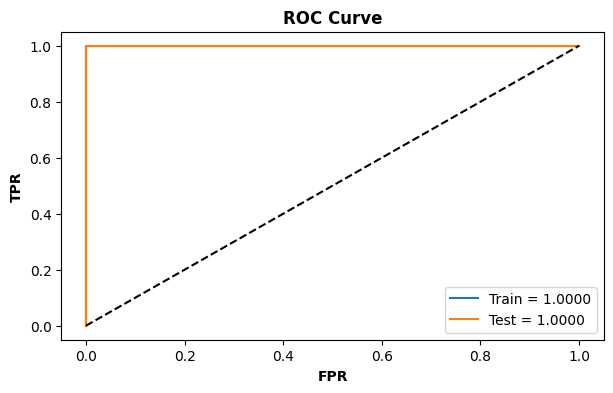

In [54]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_prob_train)
auc_train = roc_auc_score(y_train, y_pred_prob_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

fig,ax = plt.subplots(figsize = (7,4))

ax.plot(fpr_train, tpr_train, label = f'Train = {auc_train:.4f}')
ax.plot(fpr_test, tpr_test, label = f'Test = {auc_test:.4f}')
ax.plot([0,1], linestyle = '--', color = 'black')
ax.set_title("ROC Curve", fontsize = 12, fontweight = "bold")
ax.set_xlabel("FPR", fontsize = 10, fontweight = "bold", color = "black")
ax.set_ylabel("TPR", fontsize = 10, fontweight = "bold", color = "black")
ax.legend()
fig.show()